# EX2_2
Find different words in newspaper article
We'll do this using morphology operators and connected components.


In [1]:
# to run in google colab
import sys
if 'google.colab' in sys.modules:
    import subprocess
    subprocess.call('apt-get install subversion'.split())
    subprocess.call('svn export https://github.com/YoniChechik/AI_is_Math/trunk/c_02a_basic_image_processing/ex2/news.jpg'.split())



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

figsize = (10, 10)



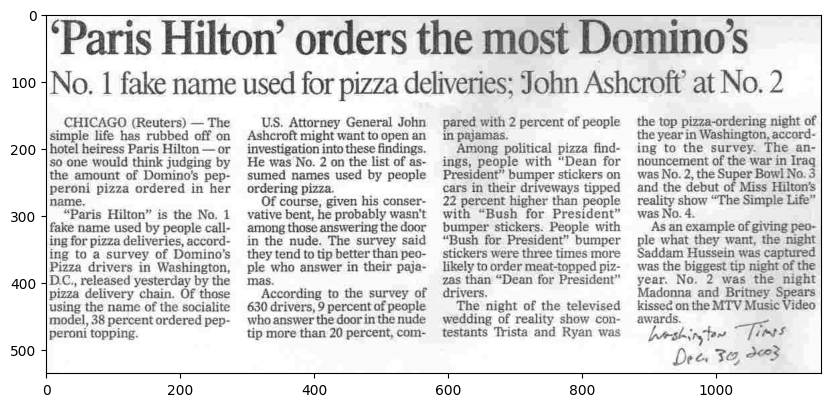

In [3]:
im = cv2.imread("news.jpg")
im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)

plt.figure(figsize=figsize)
plt.imshow(im_gray,cmap="gray",vmin=0,vmax=255)
plt.show()



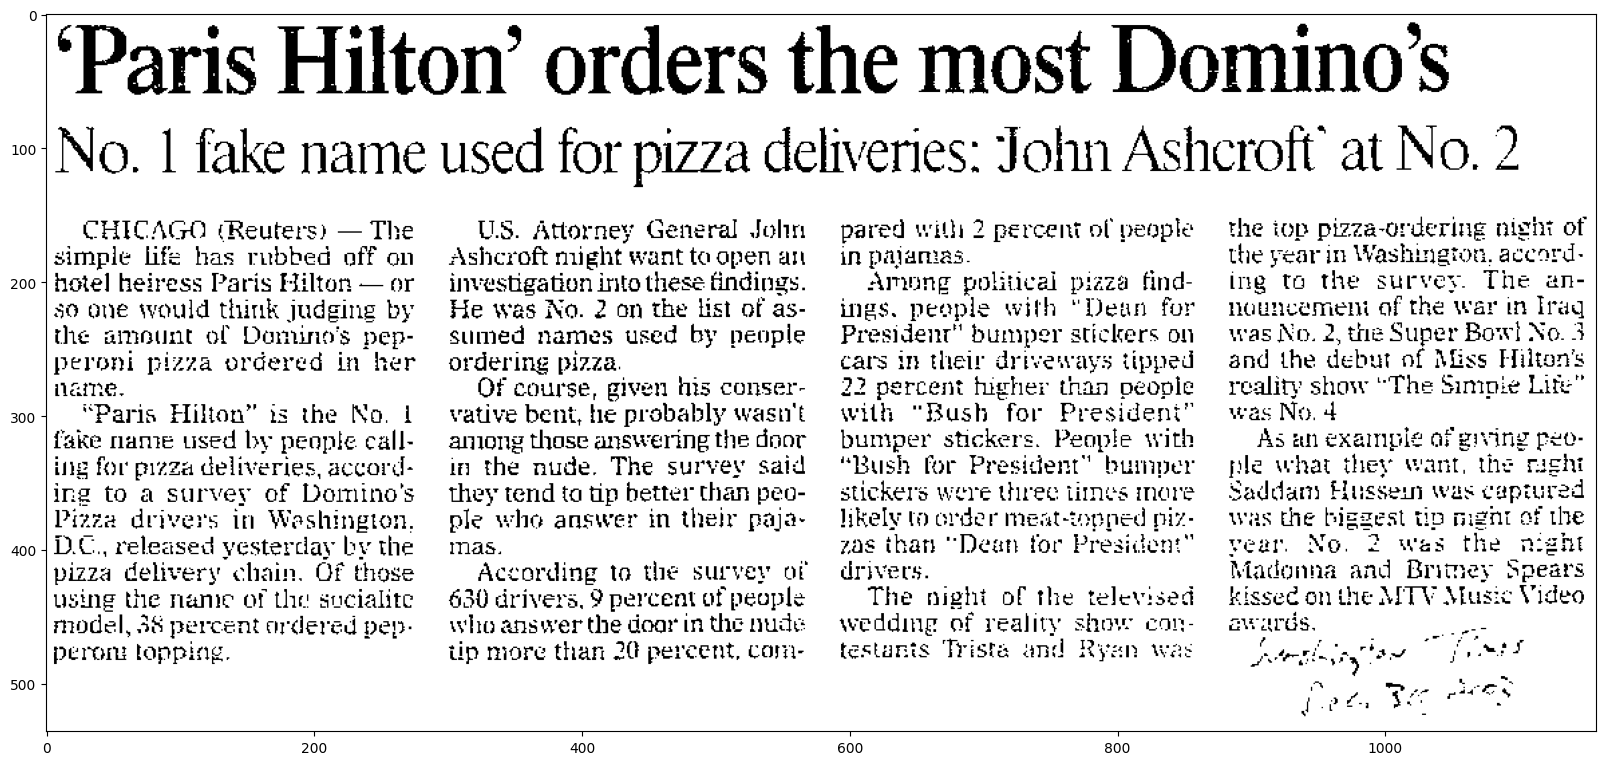

In [4]:
#Turns the original image to a binary one

plt.figure(figsize=(20,20))
threshold_value = 128
_,binaryImg = cv2.threshold(im_gray, threshold_value, 255, cv2.THRESH_BINARY)
plt.imshow(binaryImg, cmap="gray")
plt.show()




In [5]:
# Merges all pixels of the same word together to make one connected component

rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (8, 5))
rect_kernel2 = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 2))

rows = binaryImg.shape[0]
cols = binaryImg.shape[1]

# Splits the image into 2 parts, Headline and text.
headline_region = binaryImg[0:140, 0:cols]
text_inside_region = binaryImg[150:rows, 0:cols]

# Makes an 'Open' operation to each part with its own kernel.
im_headline = cv2.morphologyEx(headline_region, cv2.MORPH_OPEN, rect_kernel)
im_text = cv2.morphologyEx(text_inside_region, cv2.MORPH_OPEN, rect_kernel2)

# Creates a copy of the original image
result_image = cv2.cvtColor(binaryImg, cv2.COLOR_GRAY2BGR)

# Converts grayscale processed parts to BGR color format
im_headline_bgr = cv2.cvtColor(im_headline, cv2.COLOR_GRAY2BGR)
im_text_bgr = cv2.cvtColor(im_text, cv2.COLOR_GRAY2BGR)

# Replaces the corresponding parts with the processed parts
result_image[0:140, 0:cols] = im_headline_bgr
result_image[150:rows, 0:cols] = im_text_bgr

result = cv2.bitwise_not(result_image)
result = cv2.cvtColor(result,cv2.COLOR_BGR2GRAY)

In [6]:

def find_words(dilated_im,im):
    res = im.copy()

    # Finds connected components in the dilated image
    _, labels, _, _ = cv2.connectedComponentsWithStats(dilated_im, connectivity=8)

    # Iterates through each connected component
    for label in range(1, labels.max() + 1):

        # Create a mask for the current connected component
        mask = np.uint8(labels == label)

        # Draws a rectangle around the word in the result image
        res = plot_rec(mask, res)

    return res

def plot_rec(mask,res_im):
    # plot a rectengle around each word in res image using mask image of the word
    xy = np.nonzero(mask)
    y = xy[0]
    x = xy[1]
    left = x.min()
    right = x.max()
    up = y.min()
    down = y.max()

    res_im = cv2.rectangle(res_im, (left, up), (right, down), (0, 20, 200), 2)
    return res_im


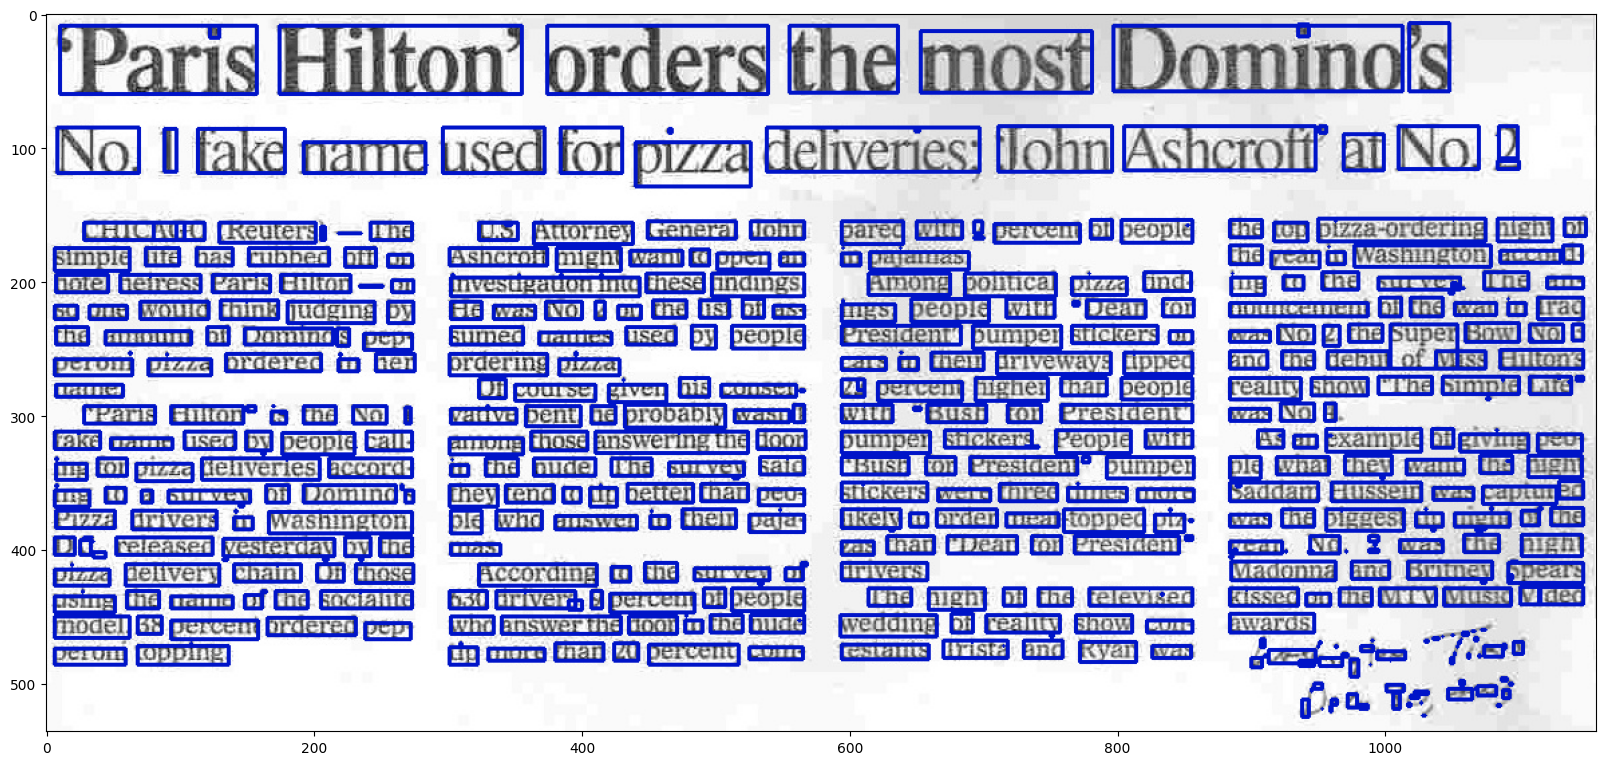

In [7]:
plt.figure(figsize=(20,20))
plt.imshow(find_words(result,im))
plt.show()


